SARSA:
State, Action, Reward, nextState, nextAction
- On Policy Algorithm
- Iterative Algorithm
- Converges to an optimal policy as long as each state-action pair is visited 'n' number of times

Difference with Q-learning:
- Value of Q directly approximates the optimal action-val function independently of the policy being followed (Off policy)
- QLearning will only seem to follow e-greedy policy
- Sarsa converges faster than Q learning. So in situations where agent's performance matters most, Sarsa is preferable.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import gym
from gym import spaces
import math

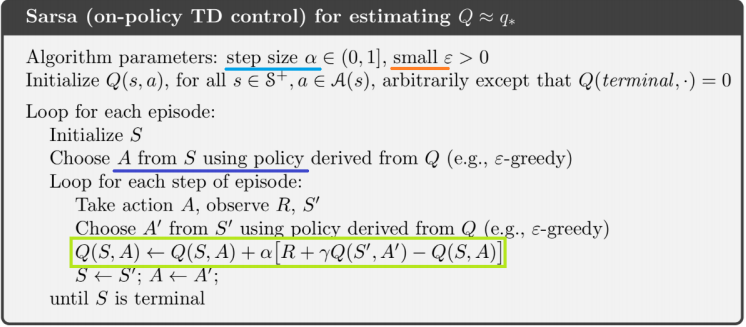

In [7]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(4)
        print("action space:", self.action_space.n)
        print("observation_space:", self.observation_space.n)
        self.max_timesteps = 10
        self.reward = 0
        
    def imshow(self):
        plt.imshow(self.state)
        plt.pause(0.5)    
        
    def reset(self):
        self.timestep = 0
        self.reward = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [4, 4]
        self.state = np.zeros((5,5))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.8
        self.state[tuple([2,3])] = 0.5
        for i in range(1,5):
            self.state[tuple([i,0])] = 0.5
            self.state[tuple([4,i-1])] = 0.5
        for j in range(1,3):
            self.state[tuple([j,2])] = 0.5

        observation = self.state.flatten()
        return observation, self.agent_pos
    
    def step(self, action):
        #Action 0 = down
        #Action 1 = up
        #Action 2 = right
        #Action 3 = left
        
        #Reward = {-20, 0, 100}
        
        reward = 0
        if action == 0:
            self.agent_pos[0] += 1
        if action == 1:
            self.agent_pos[0] -= 1
        if action == 2:
            self.agent_pos[1] += 1
        if action == 3:
            self.agent_pos[1] -= 1
          
        self.agent_pos = np.clip(self.agent_pos, 0, 4)
        self.state = np.zeros((5,5))
        self.state[tuple([2,3])] = 0.5
        for i in range(1,5):
            self.state[tuple([i,0])] = 0.5
            self.state[tuple([4,i-1])] = 0.5
        for j in range(1,3):
            self.state[tuple([j,2])] = 0.5
          
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.8
        observation = self.state.flatten()
        
        self.timestep += 1
        done = True if self.timestep >= self.max_timesteps else False
        
        if (self.agent_pos == self.goal_pos).all():
            reward = 100
            done = True
        if (self.agent_pos == tuple([2,3])).all():
            reward = -20
        for i in range(1,5):
            if (self.agent_pos == tuple([i,0])).all():
                reward = -20
            if (self.agent_pos == tuple([4,i-1])).all():
                reward = -20
        for j in range(1,3):
            if (self.agent_pos == tuple([j,2])).all():
                reward = -20
        
        
        info = {}
        return observation, reward, done, self.agent_pos


action space: 4
observation_space: 25


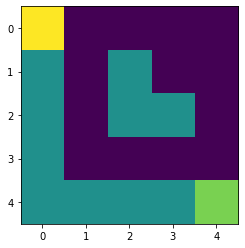

In [8]:
env1 = GridEnvironment()
env1.reset()
env1.imshow()

# SARSA Algorithm

action space: 4
observation_space: 25
Q table: 
 [[-15.50193949   4.42130142  28.92150863   0.64909161]
 [  4.87597804   7.04707203  30.94018074   5.8328839 ]
 [  2.97144547  16.02675565  29.36722934   0.36373662]
 [ 39.67281619  33.60203053  39.52439132   7.06137717]
 [ 49.82740363  34.79812928  31.16539888  14.23336337]
 [ -5.47207086  -9.31590007   7.53716745  -7.16627763]
 [ -4.58649437  11.86949108  -5.88316543 -16.05284836]
 [ -2.95609188  14.25722299  38.25599976  -0.33519246]
 [ 30.31915552  28.64118276  51.09372996  17.73941093]
 [ 81.61745845  34.7753616   47.62518152  30.61267092]
 [-34.82397559 -23.12382365  31.62672727 -27.40297318]
 [ 51.95849213  -9.96712953  -0.5146299  -17.67415112]
 [ 56.87253373 -19.19705733  34.79964929  13.80411882]
 [ 63.91168671   7.65593407  76.63523066  34.36436146]
 [ 93.73535602  39.77093397  44.64059639  46.3335415 ]
 [-27.50246865  -1.35093041  38.4047857   -5.77351508]
 [ -4.91866358 -10.27720593  34.0636778   12.18115878]
 [-17.07050659  

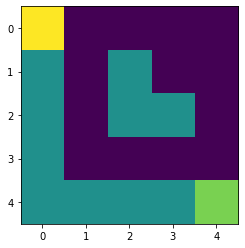

Initial position:  [0, 0]
Action:  2
Next state:  [0 1]
Reward:  0


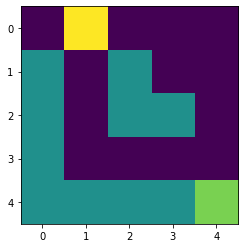

Action:  2
Next state:  [0 2]
Reward:  0


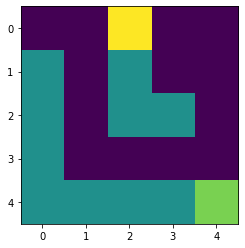

Action:  2
Next state:  [0 3]
Reward:  0


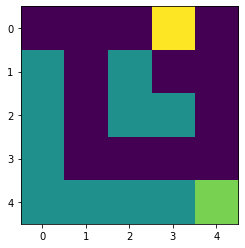

Action:  0
Next state:  [1 3]
Reward:  0


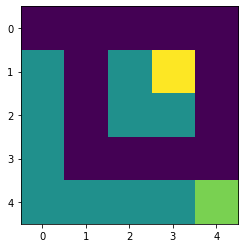

Action:  2
Next state:  [1 4]
Reward:  0


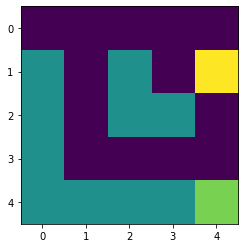

Action:  0
Next state:  [2 4]
Reward:  0


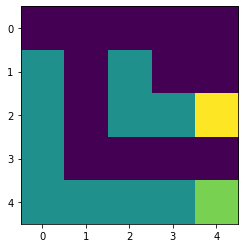

Action:  0
Next state:  [3 4]
Reward:  0


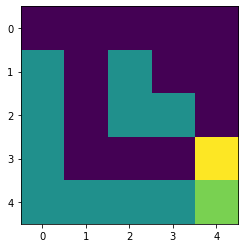

Action:  0
Next state:  [4 4]
Reward:  100


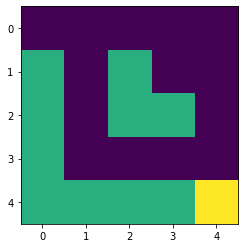

Reached goal state!
Total reward:  100


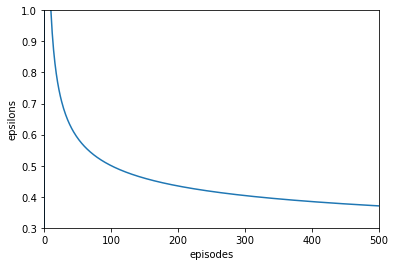

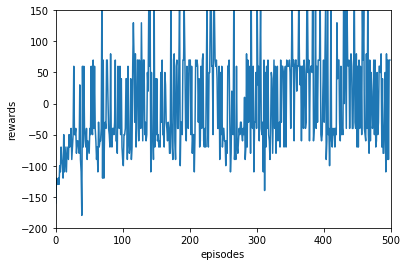

In [11]:
import matplotlib.pyplot as plt

class Agent():
    def __init__(self, env):
        self.epsilon = 0.9
        self.total_episodes = 500
        self.max_steps = 12
        self.alpha = 0.4
        self.gamma = 0.95
        self.epsilons = []
        self.rewards = []
        self.Q = np.zeros((env.observation_space.n, env.action_space.n))
        self.state_space = np.zeros((5,5))
        k=0
        for j in range(5):
            for i in range(5):
                self.state_space[j,i] = k
                k += 1
        
    def choose_action(self, s, env, epsilon):
        if np.random.uniform(0, 1) < epsilon: 
            action = np.random.choice(env.action_space.n)
        else: 
            action = np.argmax(self.Q[s, :])
        return action 
    
    def update(self, s1, s2, reward, action1, action2):
        if s1 == 24:
            return s2, action2
        self.Q[s1, action1] = self.Q[s1, action1] + (self.alpha * (reward + (self.gamma * self.Q[s2, action2]) - self.Q[s1, action1]))
        return s2, action2
    
    def get_epsilon(self, t):
        #Adopted implementation of epsilon decay by OREILLY online library: Decayed epsilon greedy
        #website: https://www.oreilly.com/library/view/r-machine-learning/9781789807943/8729e46c-242b-4e03-9063-2e9ad758b274.xhtml"
        
        self.epsilon = 1 / math.log10(t + 0.00001)
        
        return self.epsilon
        
    def learn_agent(self, env):
        for episode in range(self.total_episodes): 
            count = 0
            total_reward = 0
            obs1, pos1 = env.reset() 
            state1 = int(self.state_space[pos1[0],pos1[1]])
            ep = self.get_epsilon(episode)
            self.epsilons.append(ep)
            action1 = self.choose_action(state1, env, ep)
            done = False
            while not done or count < self.max_steps:

                obs2, reward, done, pos2 = env.step(action1) 
                state2 = int(self.state_space[pos2[0],pos2[1]])
                action2 = self.choose_action(state2, env, self.get_epsilon(episode))
                if state1 == state2 or state2 < state1:
                    reward = -10
                state1, action1 = self.update(state1, state2, reward, action1, action2) 

                count += 1
                total_reward += reward
            self.rewards.append(total_reward)
        print("Q table: \n", self.Q)
    
    def test_agent(self, env):
        print("Start of Testing ----")
        done = False
        total_reward = 0
        obs, pos1 = env.reset()
        plt.imshow(env.state)
        plt.pause(0.5)
        print("Initial position: ", pos1)
        while not done:
            action = np.argmax(self.Q[int(self.state_space[pos1[0],pos1[1]]), :])
            obs2, reward, done, pos2 = env.step(action)
            print("Action: ", action)
            print("Next state: ", pos2)
            print("Reward: ", reward)
            pos1 = pos2
            plt.imshow(env.state)
            plt.pause(0.5)
            total_reward += reward
            if (pos2 == [4,4]).all():
                print("Reached goal state!")
                print("Total reward: ", total_reward)
    
    def plot_graph(self):
        episodes = list(range(0,500))
        plt1.plot(episodes, self.epsilons)
        plt1.xlabel('episodes')
        plt1.xlim(0,500)
        plt1.ylabel('epsilons')
        plt1.ylim(0.3,1.0)
        plt1.show()

        plt2.plot(episodes, self.rewards)
        plt2.xlabel('episodes')
        plt2.xlim(0,500)
        plt2.ylabel('rewards')
        plt2.ylim(-200,150)
        plt2.show()

if __name__== "__main__":
    env = GridEnvironment()
    agent = Agent(env)
    agent.learn_agent(env)
    agent.test_agent(env)
    agent.plot_graph()
